# Results analysis

#### dataset Loading and options 

In [82]:
from datasets import Dataset,load_dataset
import pandas as pd
import seaborn as sb

dataset_split = ["simpleLLM_benchmark_llama3.18binstant_t_0.7"][0]

dataset = load_dataset("CharlyR/varbench-evaluation", "tikz", split=dataset_split)

result_df = dataset.to_pandas()

In [83]:
#filtering by having a result
filtered_df = result_df[result_df['index_best_prediction']!= -1]

In [84]:
filtered_df = filtered_df.select_dtypes(include=["int", "float"])
filtered_df = filtered_df.drop(
    ["compiling_score", "parsing_score", "index_best_prediction"], axis=1
)
# order text metrics first
filtered_df = filtered_df[
    [
        "var_score",
        "best_LineMetric",
        "best_TERMetric",
        "best_BleuMetric",
        "best_ChrfMetric",
        "best_ClipTextMetric",
        "best_ClipImageMetric",
        "best_MSSSIMMetric",
        "best_PSNRMetric",
        "best_LPIPSMetric",
        "best_FeatureMatchMetric",
    ]
]

## no subcategories

<Axes: >

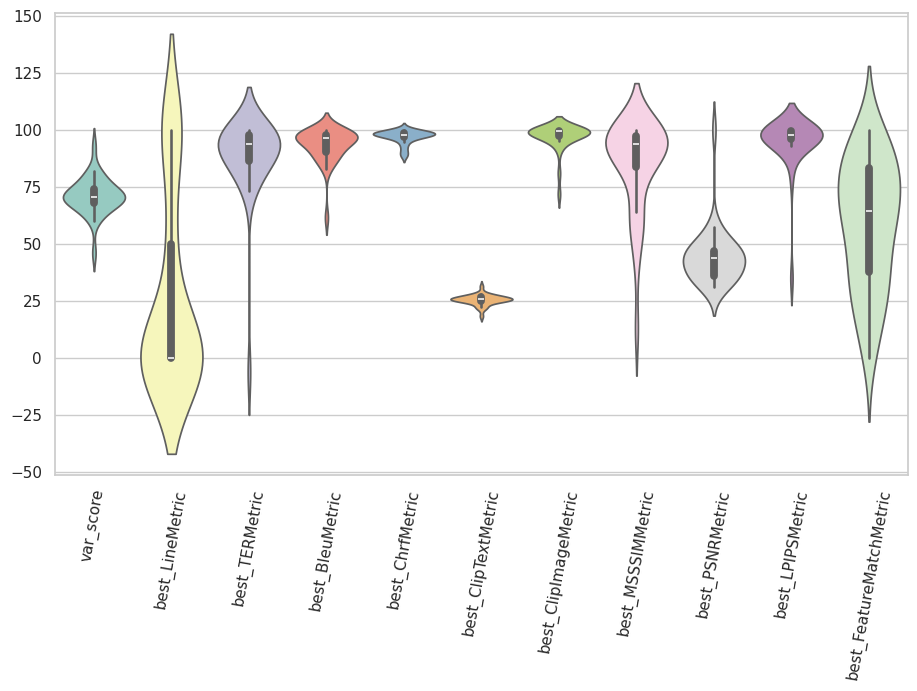

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example dataset of brain network correlations
df = filtered_df

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))
plt.xticks(rotation=80)

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=df, palette="Set3")


<Axes: >

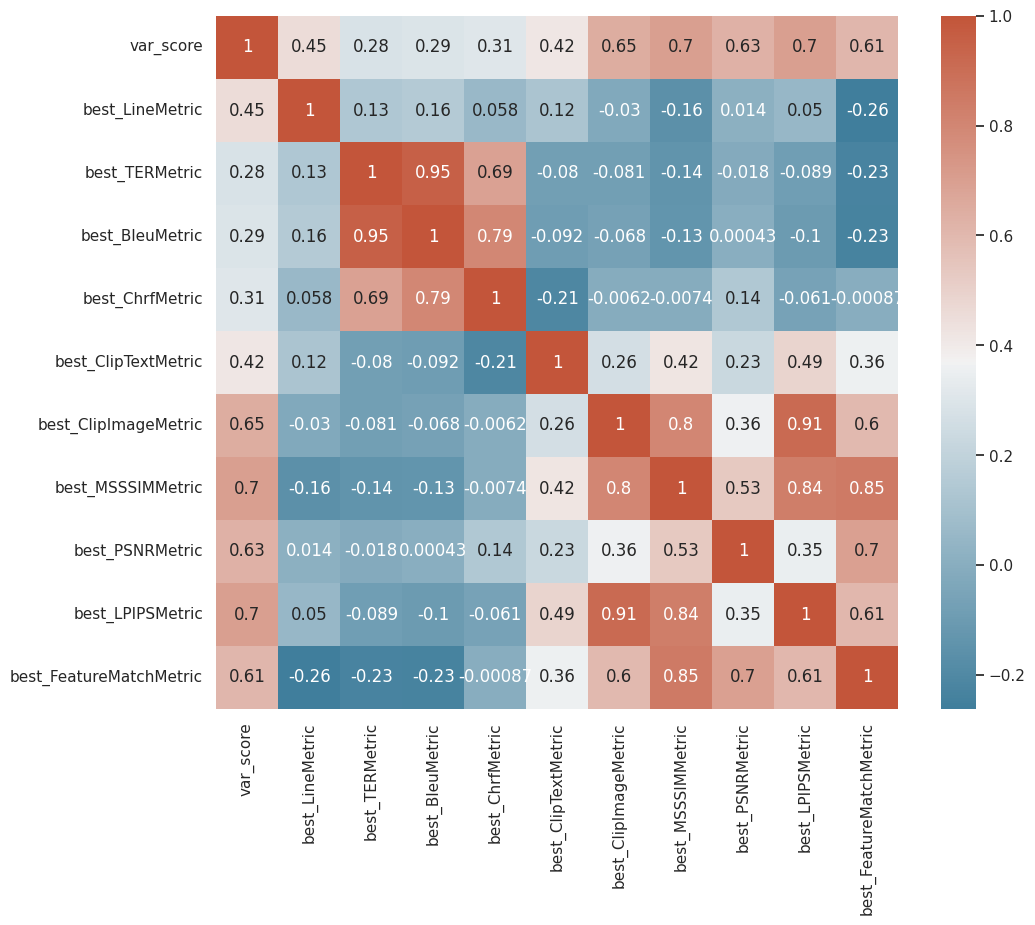

In [86]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr = filtered_df.corr()


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, annot=True)

## filtered by difficulty

In [91]:
filtered_df_dif = filtered_df
filtered_df_dif["difficulty"] = result_df["difficulty"]

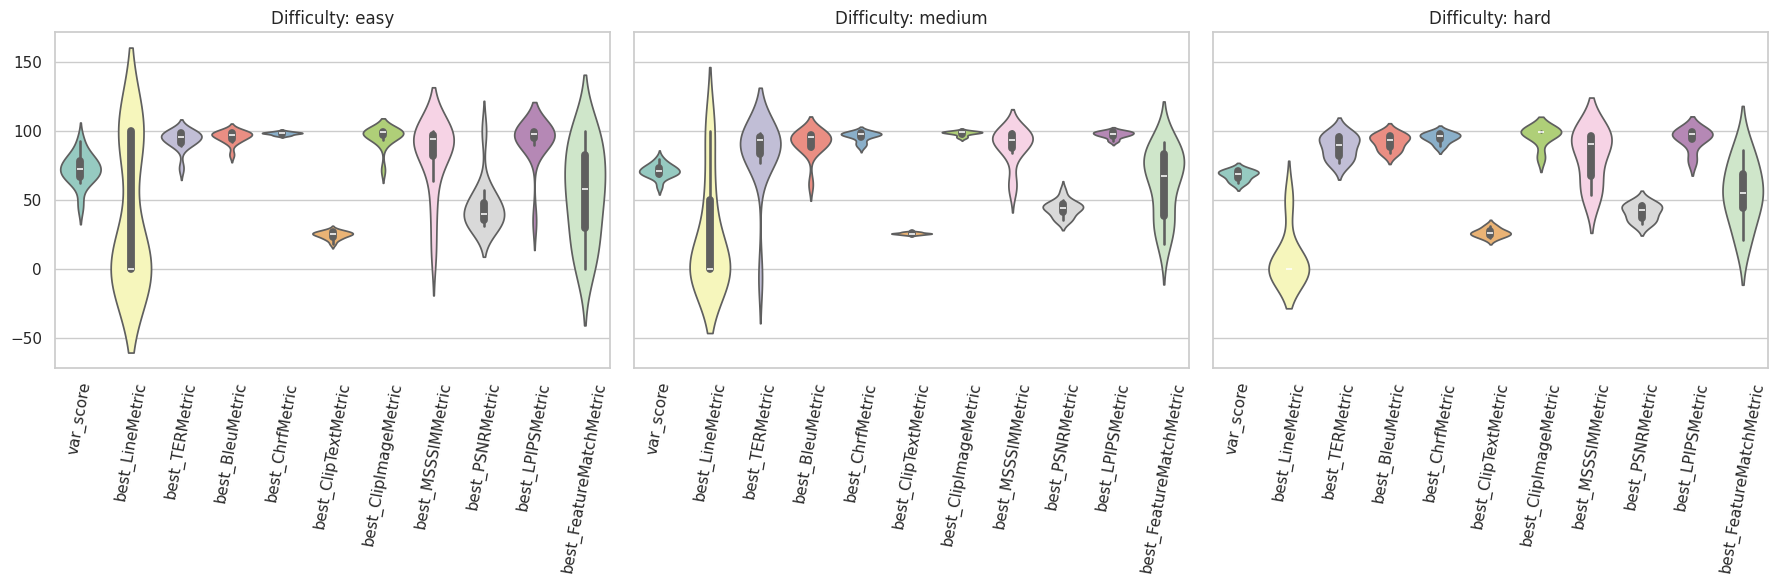

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

df = filtered_df_dif

sns.set_theme(style="whitegrid")

# Assuming 'difficulty' column exists in the DataFrame
difficulties = ['easy', 'medium', 'hard']
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # Create 3 subplots

for i, difficulty in enumerate(difficulties):
    sns.violinplot(
        data=filtered_df_dif[filtered_df_dif['difficulty'] == difficulty], 
        ax=axes[i], 
        palette="Set3"
    )
    axes[i].set_title(f'Difficulty: {difficulty}')
    axes[i].tick_params(axis='x', rotation=80)

plt.tight_layout()
plt.show()


In [99]:
filtered_df['difficulty'] = pd.Categorical(filtered_df['difficulty'], categories=['easy', 'medium', 'hard'], ordered=True)
averages = filtered_df.groupby('difficulty').mean()
averages

/tmp/ipykernel_122533/974700466.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  averages = filtered_df.groupby('difficulty').mean()


,var_score,best_LineMetric,best_TERMetric,best_BleuMetric,best_ChrfMetric,best_ClipTextMetric,best_ClipImageMetric,best_MSSSIMMetric,best_PSNRMetric,best_LPIPSMetric,best_FeatureMatchMetric
difficulty,,,,,,,,,,,
easy,72.200420,38.461538,93.809155,95.797961,98.402109,24.622535,95.885948,81.325594,45.901155,92.179943,55.618262
medium,71.159058,23.076923,83.081796,91.348499,96.212019,25.827126,98.429779,88.791616,43.995135,97.571433,63.256257
hard,68.012367,8.333333,88.604530,92.252328,95.312650,26.348265,96.440416,81.785191,41.223981,94.480588,55.342383


In [100]:
med = filtered_df.groupby('difficulty').median()
med

/tmp/ipykernel_122533/1903738609.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med = filtered_df.groupby('difficulty').median()


,var_score,best_LineMetric,best_TERMetric,best_BleuMetric,best_ChrfMetric,best_ClipTextMetric,best_ClipImageMetric,best_MSSSIMMetric,best_PSNRMetric,best_LPIPSMetric,best_FeatureMatchMetric
difficulty,,,,,,,,,,,
easy,72.485641,0.0,95.569618,97.084702,98.591225,25.336811,99.264832,93.997589,39.844341,97.825569,58.064518
medium,71.448250,0.0,93.577980,95.573929,97.637932,25.674559,99.084465,93.516449,44.334419,97.587921,67.567566
hard,69.191443,0.0,90.208462,93.724850,96.134640,25.860937,99.546124,90.685020,42.685886,97.631889,55.262445
